In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [15]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:33<00:00, 37.5MB/s]
100% 1.06G/1.06G [00:33<00:00, 34.0MB/s]


In [16]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential 
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

# New Section

In [18]:
# Generators ( Very usefull to operate in large amount of data)

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [19]:
# Normalize our Dataset(For Pixcel value lies b/w 0 to 1)

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [20]:
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Activation, Dense,Dropout

In [21]:
# Now Create Our CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 83s 117ms/step - loss: 1.4357 - accuracy: 0.5814 - val_loss: 0.7538 - val_accuracy: 0.5802
Epoch 2/10
625/625 [==============================] - 74s 117ms/step - loss: 0.6273 - accuracy: 0.6578 - val_loss: 0.5804 - val_accuracy: 0.6852
Epoch 3/10
625/625 [==============================] - 73s 115ms/step - loss: 0.5451 - accuracy: 0.7210 - val_loss: 0.5629 - val_accuracy: 0.7248
Epoch 4/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4696 - accuracy: 0.7719 - val_loss: 0.4996 - val_accuracy: 0.7628
Epoch 5/10
625/625 [==============================] - 73s 115ms/step - loss: 0.4150 - accuracy: 0.8008 - val_loss: 0.5912 - val_accuracy: 0.7420
Epoch 6/10
625/625 [==============================] - 74s 117ms/step - loss: 0.3650 - accuracy: 0.8249 - val_loss: 0.5806 - val_accuracy: 0.7392
Epoch 7/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3185 - accuracy: 0.8541 - val_loss: 0.4751 - val_ac

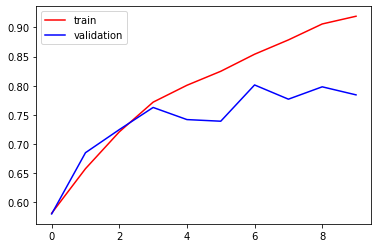

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

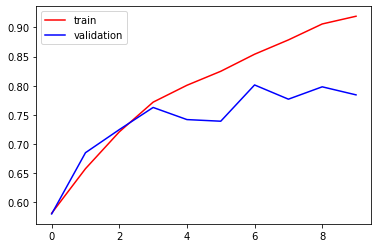

In [26]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

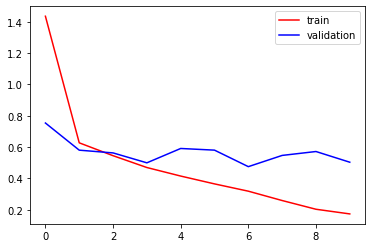

In [27]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

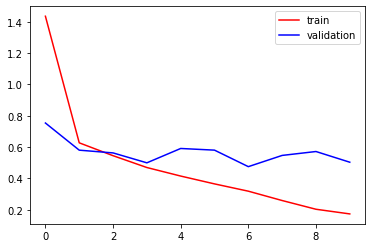

In [28]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [29]:
# ways to reduce overfitting

# Add more data
# Data Augmentation 
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [30]:
import cv2


In [34]:
test_img = cv2.imread('/content/dog.jpg')

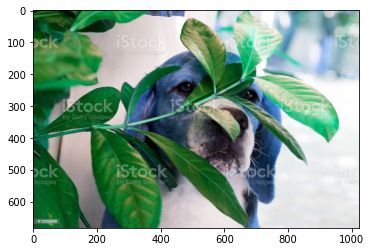

In [36]:
plt.imshow(test_img);

In [37]:
test_img.shape

(683, 1024, 3)

In [38]:
test_img = cv2.resize(test_img,(256,256))

In [39]:
test_input = test_img.reshape((1,256,256,3))

In [40]:
model.predict(test_input)

1/1 [==============================] - 0s 249ms/step


array([[1.]], dtype=float32)